In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 0. 문제의 정의 

*   주제 : 다음 분기에 우수한 게임 판매 성과(출하량)를 이루기 위해 어떤 게임을 어떻게 기획해야 할까?
*   프로젝트 상황 : column에 관한 간단한 description만 받고, 세부적인 데이터 설명은 전달받지 못한 데이터라 가정. (결측치,이상치)
*   지역에 따라서 선호하는 게임 장르가 다를까?
*   연도별 게임의 트랜드가 있을까?
*   판매량이 높은 게임에 대한 분석 및 시각화 프로세스 구현







# 1. Data Preprocessing 
Data Cleaning, EDA, Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

plt.style.use('seaborn')
sns.set(font_scale=1.0)


# 데이터 형태 파악
data = pd.read_csv('/content/drive/MyDrive/부트캠프/vgames2.csv')
print(f'데이터 shape : \n {data.shape} \n')
data.head()


데이터 shape : 
 (16598, 10) 



,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
# Unnamed 열 성분은 Index와 큰 차이가 없다고 판단하여 열 삭제

df = data.drop(['Unnamed: 0'],axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# Year 열은 int type으로 변경, Sales 열들은 float type 으로 변경 결정.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64


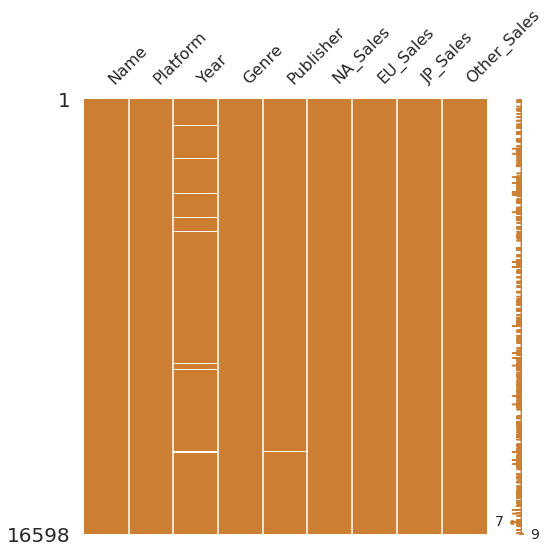

In [ ]:
# Null 값 시각화 (missingno 라이브러리 사용)

  # Null 이 포함된 행이 전체 행에 비해 적을 경우 bar plt 보다 msno.matrix 시각화가 더 직관적이다.

import missingno as msno

msno.matrix(df,figsize=(8,8),color=(0.8,0.5,0.2))  

print(df.isnull().sum())


In [ ]:
# 전체 데이터 수에 대한 결측치의 비율이 작다고 판단해 일단은 결측치 행을 제거하여 진행.

  # 년도 결측치는 증가감소 추세가 아니기 때문에 df.fillna(method='pad')처럼 결측치 바로 이전,이후 값으로 채우는 것 사용 x 

df = df.dropna()
print(df.isnull().sum())
print('\n shape : \n ',df.shape)
df.head(15)

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

 shape : 
  (16241, 9)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [ ]:
# data type 변환하기 전 K,M 값을 가진 행 제거
# K 와 M 의 정보가 무엇인지 명확하지 않고 포함된 행이 적다고 판단하여 제거

for col in [5,6,7,8]:
  
  df = df[~df.iloc[:,col].str.contains("K", na=False, case=False)]
  df = df[~df.iloc[:,col].str.contains("M", na=False, case=False)] 

df.shape

(15476, 9)

In [ ]:
# data type 변환 

df = df.astype({'Year' : 'int' , 'NA_Sales' : 'float','EU_Sales' : 'float','JP_Sales' : 'float','Other_Sales' : 'float'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15476 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         15476 non-null  object 
 1   Platform     15476 non-null  object 
 2   Year         15476 non-null  int64  
 3   Genre        15476 non-null  object 
 4   Publisher    15476 non-null  object 
 5   NA_Sales     15476 non-null  float64
 6   EU_Sales     15476 non-null  float64
 7   JP_Sales     15476 non-null  float64
 8   Other_Sales  15476 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


In [ ]:
# 기술통계치를 통해 Sales 데이터의 분포양상이 비슷하다고 생각하였음.

df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,15476.000000,15476.000000,15476.000000,15476.000000,15476.000000
mean,1994.340010,0.263680,0.146372,0.077810,0.048344
std,154.463026,0.824188,0.510354,0.309821,0.192612
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2017.000000,41.490000,29.020000,10.220000,10.570000


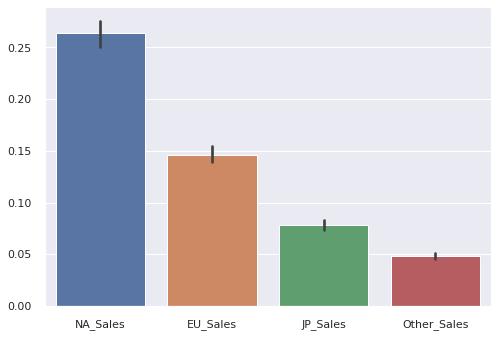

In [ ]:
# 시각화 Part
# 지역에 따른 판매량 비교

sns.barplot(data=df.loc[:,'NA_Sales':'Other_Sales'])

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.962224,0.811135,0.953203
EU_Sales,0.962224,1.000000,0.818756,0.962097
JP_Sales,0.811135,0.818756,1.000000,0.760108
Other_Sales,0.953203,0.962097,0.760108,1.000000


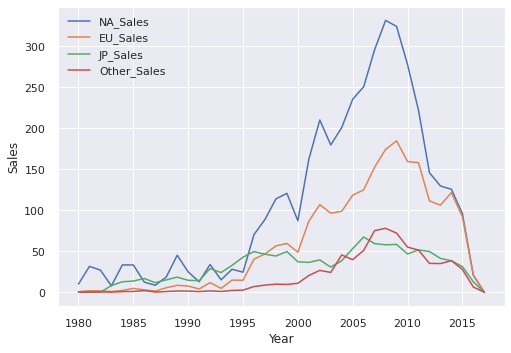

In [ ]:
# 시간에 따른 각나라의 게임 판매량 비교
# 4자리가 아닌 년도 데이터는 정확한 년도를 추정하기 어렵고 데이터 양이 많지 않다고 생각해서 제거.
condition = (df.Year >1500)
df_year = df[condition]

grouped_year = df_year.groupby('Year').sum()
grouped_year.plot.line()
plt.ylabel('Sales')
grouped_year.corr()
# 2005~2010 사이에 전반적으로 게임 산업이 흥했음

Text(0.5, 0, 'Total Sales')

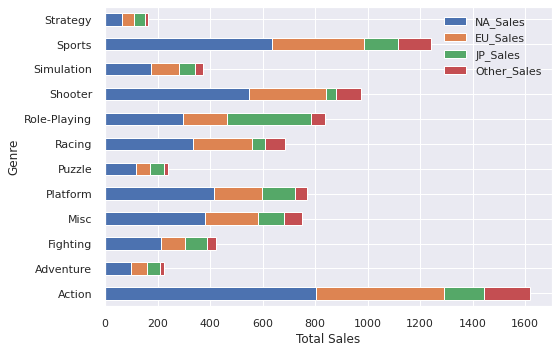

In [ ]:
# 게임 장르와 나라별 판매량의 관계
# barh 차트가 전체적으로는 깔끔하게 눈에 잘 들어옴 (ex. 가장 인기있는 장르, 대략적 Sales 분포 등)
grouped_genre_sales = df.groupby('Genre').sum()
grouped_genre_sales = grouped_genre_sales.drop('Year',axis=1)
grouped_genre_sales.plot.barh(stacked=True)
plt.xlabel('Total Sales')


NA_Sales       403.956
EU_Sales       216.619
JP_Sales       116.215
Other_Sales     72.653
Name: 0.7, dtype: float64


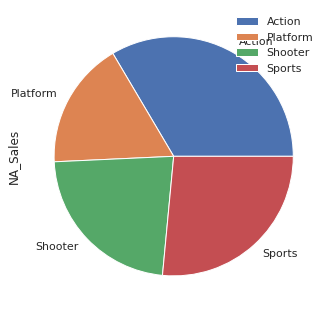

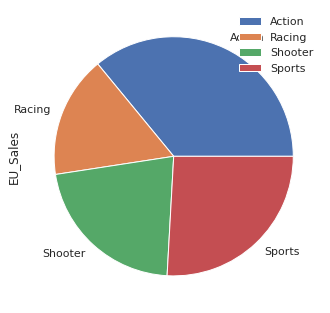

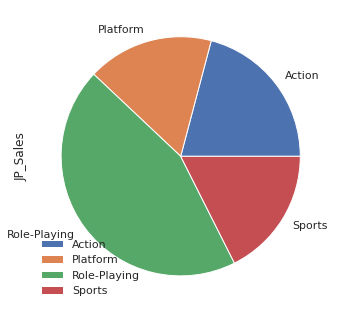

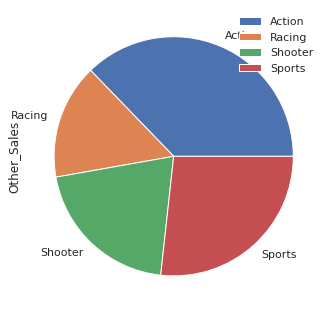

In [ ]:
# 게임 장르와 나라별 판매량의 관계2 - pie chart
# ABC Rule을 토대로 70%의 점유율을 차지하는 게임 장르만을 Plot
# 나라별로 따로따로 어떤 장르가 선호도가 높은지 한눈에는 들어오지만 전체적으로는 barh보다 별로.

grouped_Genre = df.groupby('Genre').sum().iloc[:,1:]
print(grouped_Genre.quantile(.7))

def abc_genre(col,a):
  condition = (grouped_Genre[col] > a)
  return grouped_Genre[condition].plot.pie(y=col)

abc_genre('NA_Sales',grouped_Genre.quantile(.7)['NA_Sales'])
abc_genre('EU_Sales',grouped_Genre.quantile(.7)['EU_Sales'])
abc_genre('JP_Sales',grouped_Genre.quantile(.7)['JP_Sales'])
abc_genre('Other_Sales',grouped_Genre.quantile(.7)['Other_Sales'])

# 일본은 롤플레잉 게임이 가장 인기가 많고 나머지는 비슷하게 액션과 스포츠 게임이 인기가 있음.

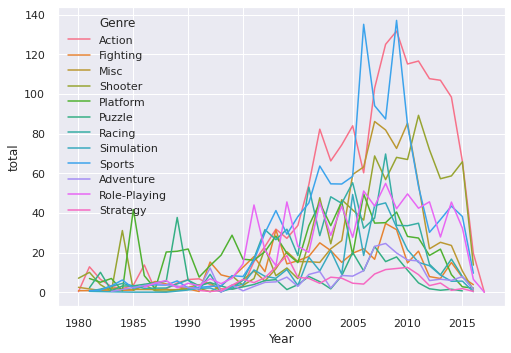

In [ ]:
# 특정 시기에 특정 장르가 유행하지 않을까?
# 시간에 따른 게임의 장르 수요 추세 확인

df_year_genre = df_year.groupby(['Year','Genre']).sum()
df_year_genre['total']=df_year_genre.sum(axis=1)
df_year_genre = df_year_genre.loc[:,'total']
grouped_year_genre = pd.DataFrame(df_year_genre)
grouped_year_genre

sns.lineplot(x='Year',y='total',data= grouped_year_genre,hue= 'Genre')

# 모든 나라의 총 합 판매량 기준 Action,Sports,Misc,Shooter 게임이 최근에 높은 점유율을 가진다.

NA_Sales       119.20
EU_Sales        65.77
JP_Sales        62.41
Other_Sales     11.31
Total_Sales    242.35
Name: 0.7, dtype: float64


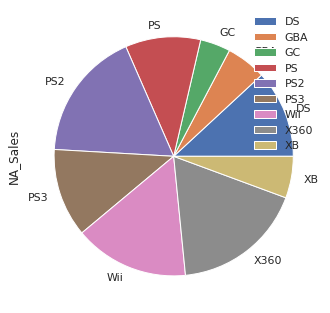

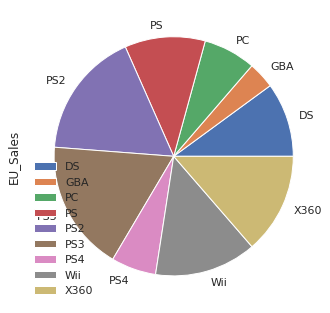

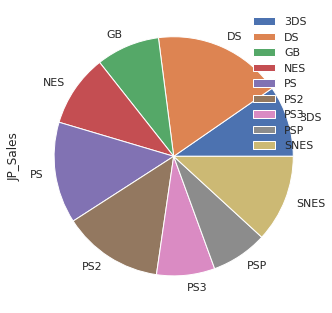

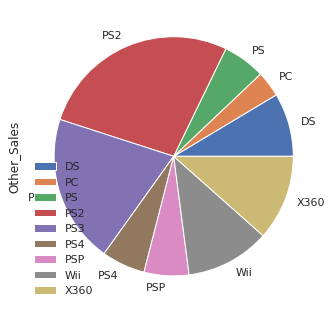

In [ ]:
# ABC 분석기법에 따라 70%에 해당하는 값보다 작은 Sales 데이터들 빼고 시각화

Platform_Sales = df_year.groupby('Platform').sum().iloc[:,1:]

Platform_Sales['Total_Sales'] = Platform_Sales.sum(axis=1)
print(Platform_Sales.quantile(.7))

def abc_plat(col,a):
  condition = (Platform_Sales[col] > a)
  return Platform_Sales[condition].plot.pie(y=col)

abc_plat('NA_Sales',Platform_Sales.quantile(.7)['NA_Sales'])
abc_plat('EU_Sales',Platform_Sales.quantile(.7)['EU_Sales'])
abc_plat('JP_Sales',Platform_Sales.quantile(.7)['JP_Sales'])
abc_plat('Other_Sales',Platform_Sales.quantile(.7)['Other_Sales'])

# 일본은 Will Platform 데이터가 70% 점유율에 못드는 것을 확인할 수 있다.
# 미국,영국,일본을 제외한 기타 나라들은 PS2,PS3 가 거의 50%를 차지 하고있음을 볼 수 있다.

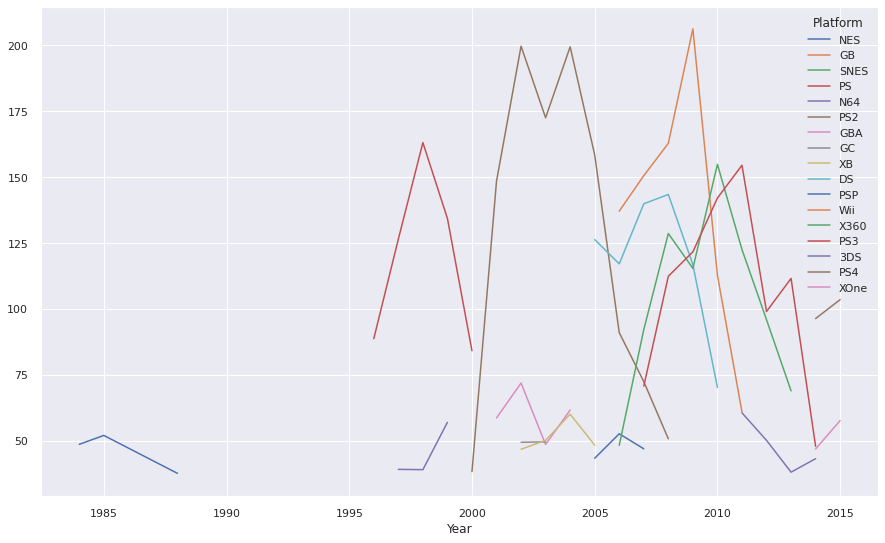

In [ ]:
# 시간에 따라 게임 플랫폼도 특정 인기 시기가 있지 않을까?
# 평균보다 낮은 판매량을 가진 플랫폼은 제거하여 플랫폼별 판매량 변화를 관찰했다.

df_Plat_year = df_year.groupby(['Year','Platform']).sum()
df_Plat_year['Total_Sales']=df_Plat_year[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
condition = (df_Plat_year.Total_Sales > df_Plat_year.Total_Sales.quantile(.7))
df_Plat_year = df_Plat_year[condition]

df_Plat_year['Total_Sales'].unstack().plot(figsize=(15,9))
# PS2 는 꽤 오래 높은 판매량을 기록했고, Will은 가장 높은 판매량을 얻었지만 2010년을 기점으로 금방 X360과 PS3 보다 낮은 판매량을 기록.

In [ ]:
# 출고량이 높은 인기 게임 분석 및 시각화

df_year['Total_Sales'] = df_year[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
df_bestgame = df_year.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)
df_bestgame = df_bestgame.sort_values(by='Total_Sales',ascending=False).reset_index(drop=True).head(15)
df_bestgame

,Name,Platform,Year,Genre,Publisher,Total_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31.38
5,Tetris,GB,1989,Puzzle,Nintendo,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,29.01
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,28.61
9,Duck Hunt,NES,1984,Shooter,Nintendo,28.31


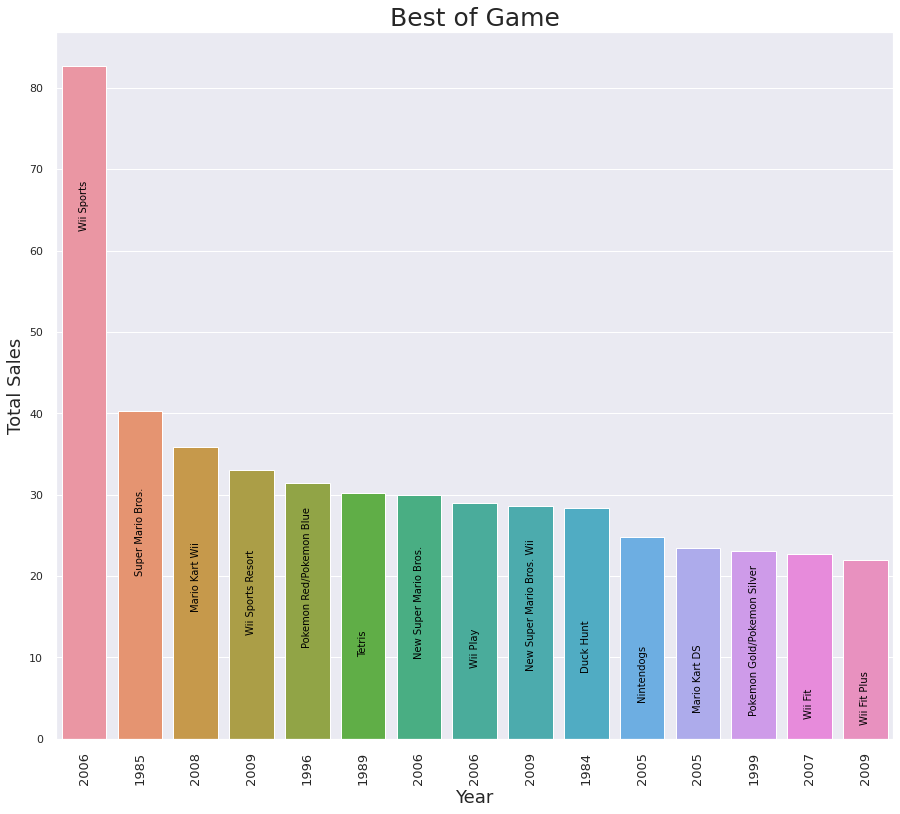

In [ ]:
name = df_bestgame.Name
year = df_bestgame.Year
xticks = np.arange(0,15)

plt.figure(figsize=(15,13))
barplot = sns.barplot(x='Name',y='Total_Sales',data=df_bestgame)
index = 0

for value in df_bestgame['Total_Sales']:
  barplot.text(index,value-20,name[index],color='#000',size=10,rotation=90,ha='center')
  index+=1

plt.xticks(xticks,df_bestgame['Year'],fontsize=13,rotation=90)
plt.title('Best of Game',fontsize=25)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Total Sales',fontsize=18)
plt.show()

# 2006년 Will이 출시되고 24년동안 넘사벽이었던 슈퍼마리오 게임보다 2배 이상 차이남.

In [ ]:
# 특정 나라의 사람들이 좋아하는 특정 게임 장르가 있지 않을까?
# One-Hot Encoding을 통한 Genre 와 나라별 판매량 상관관계 비교
  # Publisher column은 .unique() 를 통해 너무 많은 종류가 있음을 확인.

numeric_df = df[['Genre','Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

numeric_df = pd.get_dummies(data = numeric_df, columns=['Genre'])
total = numeric_df.iloc[:,1:5].sum(axis=1)
numeric_df.insert(5,'Total_Sales',total)

df_corr = numeric_df.corr()

df_corr

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
Year,1.000000,-0.004298,0.000431,-0.018840,0.002385,-0.005541,0.016944,0.013913,-0.003126,0.000918,-0.015024,-0.018335,-0.012022,0.002481,-0.012099,-0.000249,0.007844,-0.001673
NA_Sales,-0.004298,1.000000,0.768388,0.451515,0.633964,0.941444,-0.001979,-0.065311,0.000025,-0.010190,0.069580,-0.010624,0.008672,-0.019594,0.065125,-0.013584,0.013020,-0.039849
EU_Sales,0.000431,0.768388,1.000000,0.434553,0.726184,0.903120,0.011222,-0.055391,-0.012927,-0.013624,0.037231,-0.020513,0.025735,-0.016317,0.054009,-0.006095,0.010857,-0.031385
JP_Sales,-0.018840,0.451515,0.434553,1.000000,0.288955,0.610963,-0.046818,-0.035471,0.019586,-0.016529,0.055606,0.015517,-0.030750,0.154923,-0.044862,-0.001056,-0.026241,-0.005320
Other_Sales,0.002385,0.633964,0.726184,0.288955,1.000000,0.748433,0.022750,-0.053478,-0.006439,-0.007715,0.013027,-0.025851,0.022456,-0.016903,0.047109,-0.014186,0.019874,-0.033472
Total_Sales,-0.005541,0.941444,0.903120,0.610963,0.748433,1.000000,-0.003838,-0.065840,-0.001114,-0.013984,0.061189,-0.012352,0.009603,0.012906,0.048662,-0.011059,0.007623,-0.036271
Genre_Action,0.016944,-0.001979,0.011222,-0.046818,0.022750,-0.003838,1.000000,-0.146310,-0.116538,-0.169251,-0.117916,-0.095517,-0.142244,-0.157026,-0.146375,-0.117076,-0.203002,-0.102891
Genre_Adventure,0.013913,-0.065311,-0.055391,-0.035471,-0.053478,-0.065840,-0.146310,1.000000,-0.068346,-0.099261,-0.069154,-0.056018,-0.083422,-0.092091,-0.085845,-0.068661,-0.119055,-0.060343
Genre_Fighting,-0.003126,0.000025,-0.012927,0.019586,-0.006439,-0.001114,-0.116538,-0.068346,1.000000,-0.079063,-0.055082,-0.044619,-0.066447,-0.073352,-0.068377,-0.054690,-0.094829,-0.048064
Genre_Misc,0.000918,-0.010190,-0.013624,-0.016529,-0.007715,-0.013984,-0.169251,-0.099261,-0.079063,1.000000,-0.079998,-0.064801,-0.096503,-0.106531,-0.099305,-0.079427,-0.137722,-0.069805


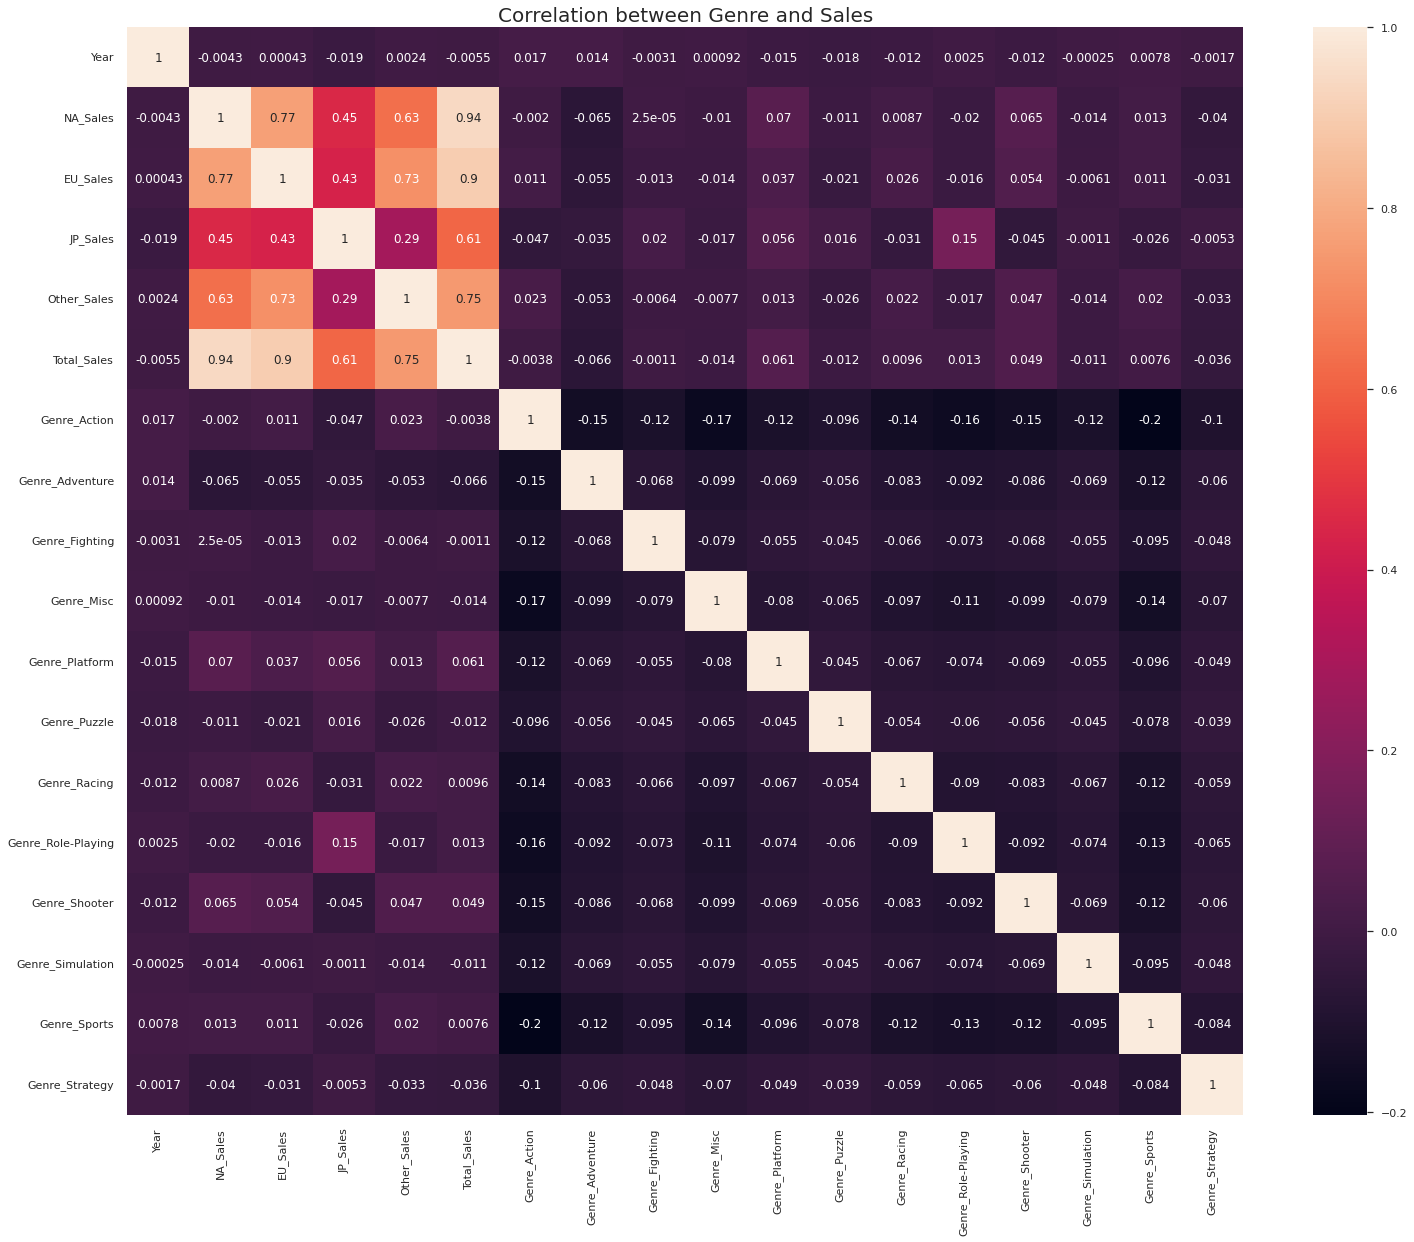

In [ ]:
# Heatmap을 통해 시각화

sns.set(rc = {'figure.figsize':(25,20)})
sns.heatmap(df_corr,annot=True)
plt.title('Correlation between Genre and Sales',fontsize=20,)
plt.show()

# 장르와 나라별 판매량과의 상관관계가 있을까했지만, 큰 연관성은 없었으며 위의 pie차트 및 horizental bar 차트를 통해 보았듯이
# 일본 판매량과 role playing 장르가 그나마 상관관계가 있었지만 heatmap 상에서는 유의미하다고 볼 수 없었다.
# 나라별 판매량의 상관관계는 유럽과 미국 / 유럽과 기타 / 미국과 기타 총 3가지의 상관관계를 보았다.
# 일본과 다른 나라들의 판매량의 상관관계는 그다지 높지 않음을 알 수 있었다.
# Platform과 Publisher의 Feature들 또한 원-핫 인코딩 후 Heatmap을 해보았지만 복잡하고 유의미한 결과가 나오지 않아 삭제.

# 2. 가설 설정 및 검정 (T-test, chi-squre,CI,Bayesian)

In [ ]:
from scipy import stats

# 나라별 판매량의 상관관계는 유럽과 미국 / 유럽과 기타 / 미국과 기타 총 3가지의 상관관계 확인..
# 신뢰도는 95%로 가정하에 chi squre 검정 사용.

print(stats.normaltest(df['NA_Sales']),'\n')
# 2sample t-test는 정규성을 만족시키지 못하기 때문에 사용 X

# 미국과 유럽의 판매량
  # 귀무 : 미국과 유럽의 판매량에는 연관이 없을 것이다.
  # 대립 : 미국과 유럽의 판매량에는 연관이 있을 것이다.

# chi 검정을 사용하기 위해 카테고리형 데이터로 변환

NA = pd.cut(df["NA_Sales"], 3).astype("category")
EU = pd.cut(df["EU_Sales"], 3).astype("category")
data = pd.crosstab(NA, EU)
data.columns = ["Low", "Mid", "High"]
data.index = ["Low", "Mid", "High"]

chi, pvalue, _, _ = stats.chi2_contingency(data, correction=False)
chi, pvalue

NormaltestResult(statistic=33565.3220905094, pvalue=0.0) 



(10683.213787218032, 0.0)

In [ ]:
# 유럽과 기타의 판매량
  # 귀무 : 유럽과 기타의 판매량에는 연관이 없을 것이다.
  # 대립 : 유럽과 기타의 판매량에는 연관이 있을 것이다.

# stats.ttest_ind(df['EU_Sales'],df['Other_Sales'])

Other = pd.cut(df["Other_Sales"], 3).astype("category")
EU = pd.cut(df["EU_Sales"], 3).astype("category")
data = pd.crosstab(EU, Other)
data.columns = ["Low", "Mid", "High"]
data.index = ["Low", "Mid", "High"]

chi, pvalue, _, _ = stats.chi2_contingency(data, correction=False)
chi, pvalue

(5158.000409491993, 0.0)

In [ ]:
# 미국과 기타의 판매량
  # 귀무 : 미국과 기타의 판매량에는 연관이 없을 것이다.
  # 대립 : 미국과 기타의 판매량에는 연관이 있을 것이다.

# stats.ttest_ind(df['NA_Sales'],df['Other_Sales'])

NA = pd.cut(df["NA_Sales"], 3).astype("category")
Other = pd.cut(df["Other_Sales"], 3).astype("category")
data = pd.crosstab(NA, Other)
data.columns = ["Low", "Mid", "High"]
data.index = ["Low", "Mid", "High"]

chi, pvalue, _, _ = stats.chi2_contingency(data, correction=False)
chi, pvalue

(2578.1677015700793, 0.0)

# 3. 모델링 (DR, PCA, Cluster)

In [ ]:
# PCA는 continuous features 에 효과적인 성능을 보이므로 년도, 인코딩 데이터 feature는 제외함.

from sklearn.preprocessing import StandardScaler
from sklearn import cluster
data = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
condition = (data['Genre'].isin(['Action','Sports','Shooter','Role-Playing']))
data = data[condition]

# 이상치 제거
test = data.sort_values(by = 'NA_Sales',ascending=False)
data = test.drop(2908)
data = data.sort_values(by = 'NA_Sales',ascending=True).reset_index(drop=True)

Sales = data[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
Sales['Total_Sales']=Sales.sum(axis=1)

# Scaling
scale = StandardScaler()

Scaled_Sales = scale.fit_transform(Sales)
Scaled_Sales = pd.DataFrame(Scaled_Sales)
Scaled_Sales.columns = Sales.columns
Scaled_Sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,-0.392532,-0.278830,-0.250777,-0.228885,-0.389185
1,-0.392532,-0.342735,-0.156715,-0.278320,-0.396378
2,-0.392532,-0.342735,1.003384,-0.278320,-0.130218
3,-0.392532,-0.342735,0.188180,-0.278320,-0.317250
4,-0.392532,-0.278830,-0.250777,-0.278320,-0.396378
...,...,...,...,...,...
7894,12.648313,0.509336,1.034738,51.975141,14.551749
7895,12.980211,7.602826,0.094118,5.307906,10.113349
7896,15.192868,18.594540,31.793027,4.665243,22.155296
7897,21.388306,23.110515,10.033341,14.354626,23.320646


In [ ]:
from sklearn.decomposition import PCA

# 공분산, 고유벡터, 고유값 계산

pca = PCA(5)

pca.fit(Scaled_Sales)

print('\n 고유벡터 : \n', pca.components_)
print('\n 고유값 : \n', pca.explained_variance_)

Projected = pca.transform(Scaled_Sales)
print('\n 사영된 데이터 : \n',Projected)


 고유벡터 : 
 [[ 0.47495555  0.48275798  0.27461989  0.42417188  0.5348122 ]
 [-0.13772701 -0.113422    0.91234637 -0.36559347  0.04617618]
 [-0.59401655 -0.02934405  0.21817569  0.75730698 -0.15864667]
 [ 0.46590233 -0.82159996  0.09227889  0.31366771  0.03171282]
 [ 0.43072944  0.27962942  0.18997892  0.12049208 -0.82805145]]

 고유값 : 
 [3.45293196e+00 8.62284723e-01 4.12902380e-01 2.72514006e-01
 3.91431653e-32]

 사영된 데이터 : 
 [[-6.95137891e-01 -7.73997567e-02  7.50460155e-02 -6.10723586e-02
   3.14468828e-17]
 [-7.24973766e-01  3.34068532e-02  6.11465875e-02 -1.56223021e-02
  -4.99607261e-17]
 [-2.64041941e-01  1.10410884e+00  2.72026479e-01  9.98709969e-02
  -5.89338783e-16]
 ...
 [ 3.87513845e+01  2.41222199e+01 -2.61583129e+00 -3.09911229e+00
  -1.09180272e-14]
 [ 4.26316299e+01 -5.84205484e-01 -4.02301690e+00 -2.85472494e+00
  -4.29714225e-16]
 [ 2.96917207e+01 -4.44293480e+00 -2.33972550e+01  1.76790849e+01
   5.69205689e-15]]


In [ ]:
df_PC = pd.DataFrame(Projected,columns=['PC1','PC2','PC3','PC4','PC5'])
df_PC

,PC1,PC2,PC3,PC4,PC5
0,-0.695138,-0.077400,0.075046,-0.061072,3.144688e-17
1,-0.724974,0.033407,0.061147,-0.015622,-4.996073e-17
2,-0.264042,1.104109,0.272026,0.099871,-5.893388e-16
3,-0.587940,0.351724,0.123841,0.018714,-1.823129e-16
4,-0.719954,-0.059659,0.038749,-0.076807,6.106158e-17
...,...,...,...,...,...
7894,36.366278,-19.185572,29.750052,22.334293,9.744383e-16
7895,17.521402,-4.037725,-5.497759,1.795356,3.910276e-16
7896,38.751385,24.122220,-2.615831,-3.099112,-1.091803e-14
7897,42.631630,-0.584205,-4.023017,-2.854725,-4.297142e-16


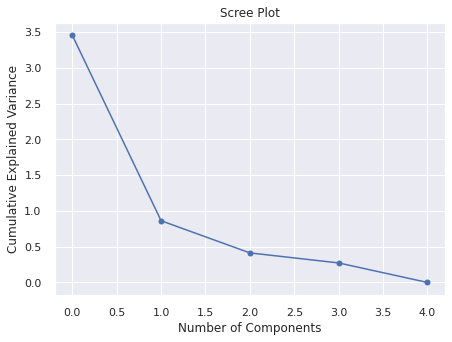

In [ ]:
# Scree Plot 을 통한 주성분 개수 결정

plt.figure(figsize=(7,5))
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_,'o-')

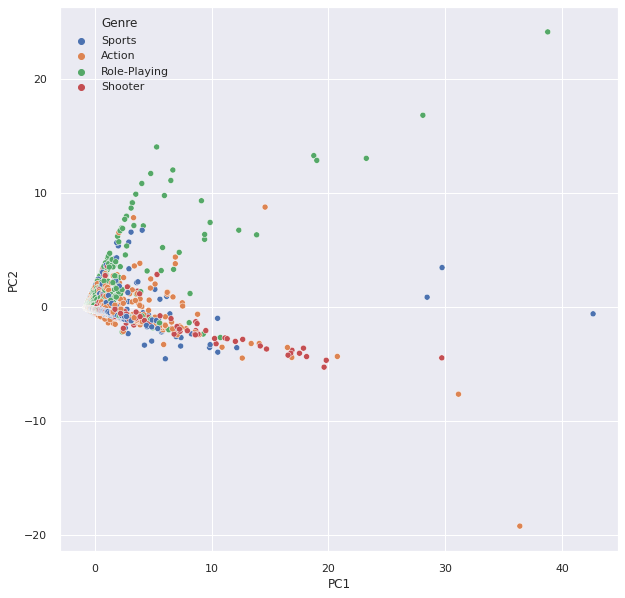

In [ ]:
# 인기 많은 상위 4가지 게임 장르로 PCA 시각화

df_PCA = df_PC[['PC1','PC2']]
df_PCA = pd.concat([df_PCA,data['Genre']],axis=1)

sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(df_PCA['PC1'],df_PCA['PC2'],data=df_PCA,hue='Genre')


In [ ]:
# Clustering
# Action, Sports, Shooter,Role-Playing

from sklearn.cluster import KMeans
condition = (df['Genre'].isin(['Action', 'Sports', 'Shooter','Role-Playing']))
data = df[condition].loc[:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Genre']].reset_index(drop=True)

# 직관적으로 4개의 클러스터 결정.
input = data.iloc[:,0:4]

km = KMeans(n_clusters = 4)
km.fit(input)
labels = km.labels_
new_series = pd.Series(labels)
data['clusters']=new_series
data


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Genre,clusters
0,0.04,0.00,0.00,0.00,Action,0
1,0.17,0.00,0.00,0.01,Action,0
2,0.00,0.00,0.14,0.00,Sports,0
3,0.07,0.00,0.11,0.01,Action,0
4,0.04,0.03,0.00,0.01,Action,0
...,...,...,...,...,...,...
7895,0.07,0.08,0.00,0.03,Shooter,0
7896,0.00,0.00,0.12,0.01,Sports,0
7897,0.01,0.00,0.00,0.00,Action,0
7898,0.44,0.19,0.03,0.13,Sports,0


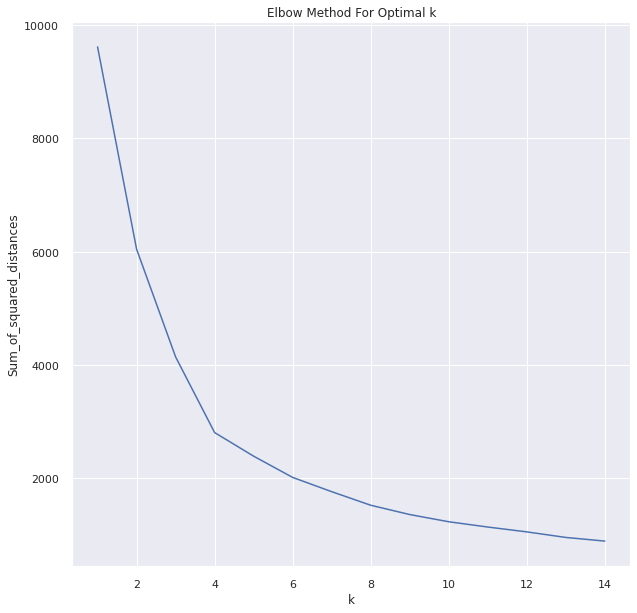

In [ ]:
# Elbow-Method를 통해 클러스터 개수 결정

sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(input)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

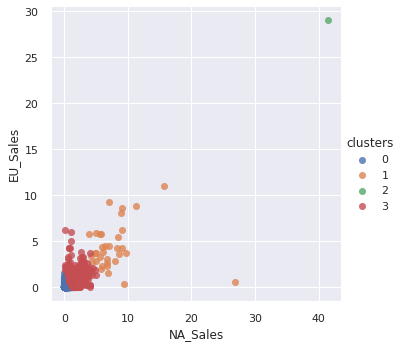

In [ ]:
sns.lmplot('NA_Sales','EU_Sales', data=data ,fit_reg=False, scatter_kws={'s':50},hue='clusters')

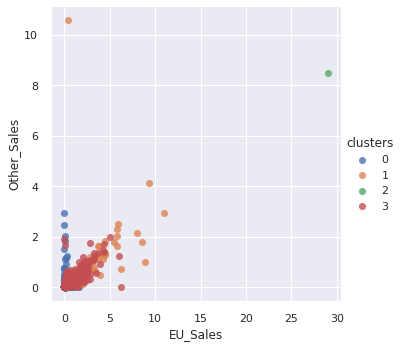

In [ ]:
sns.lmplot('EU_Sales','Other_Sales', data=data ,fit_reg=False, scatter_kws={'s':50},hue='clusters')

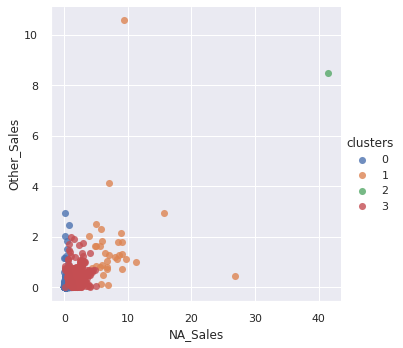

In [ ]:
sns.lmplot('NA_Sales','Other_Sales', data=data ,fit_reg=False, scatter_kws={'s':50},hue='clusters')

# 4. 모델 평가 및 최종 인사이트 도출


*   유럽과 미국의 게임 판매량의 상관관계가 유의미함을 EDA와 가설검정을 통해 알게 되었고, 유럽과 미국은 PS,PS2,PS3 등 PS시리즈의 점유율이 높으며, 최근 Action, Shooter,Sports 게임이 유행하는 분석 결과를 도출하였다.
*   일본에서는 유독 Role-Playing 게임이 점유율이 높은 분석 결과를 통해 게임 장르 Targeting Plan 수립
*   결과적으로, 게임 판매량이 높은 유럽과 미국을 중심으로 PS 시리즈의 플랫폼을 통해 Action,Shooter,Sports 장르의 게임을 메인 타겟 시장으로 선정하며, 추가적으로 일본 게임 시장은 Role-Playing 장르의 게임을 차별화 전략을 수립하여 매니아 층을 확보하는 것을 목표로 단기 경영 전략을 수립한다.
*   PCA 와 Cluster 알고리즘 모델을 통해 유의미한 결과를 도출하지 못하여 추가적인 모델링이 요구된다.
